# 决策树

决策树是一种分类回归方法,常用的算法有 ID3，C4.5，CART
决策树学习主要由三个部分组成：特征选择，决策树的生成，决策树的剪枝.其具有可读性,分类速度快的优点

决策树学习的算法通常是一个递归的选择最优特征,并根据该特征对训练数据进行分割,使得对各个子数据集有一个最好的分类过程.决策树的构建前会先选择一个最优特征,利用这个最优特征的取值把样本分成若干个子集,使得各个子集有一个在当前条件下最好的分类,如果这些子集已经能够被基本正确分类,那么构建叶节点,并将这些子集分到所对应的叶结点中去.如果还有子集不能被基本正确分类,那么就对这些子集选择新的最优特征,继续对其进行分割,构建相应的结点,如此递归下去

## 特征选择

#### ID3特征选择

ID3算法使用的是  信息增益来选择特征,信息增益越大就说明特征对分类的贡献越大信息增益的公式如下,其中D表示全部样本,C 表示类别总共有k个类别,Di表示特征取值的某个子集

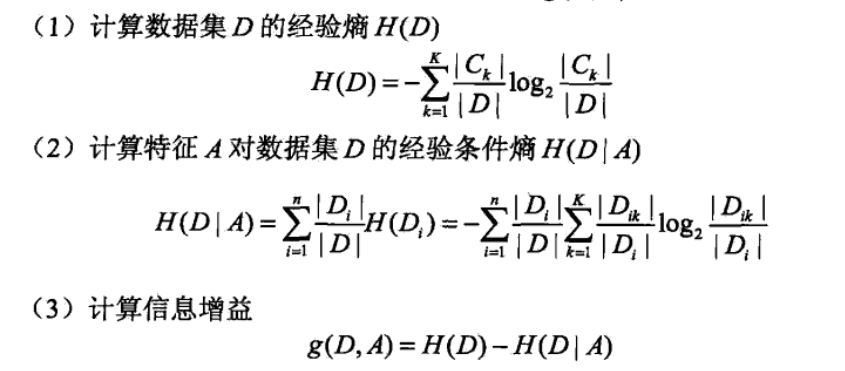

In [5]:
from IPython.core.display import Image, display
display(Image(filename='images/信息增益.png'))

#### C4.5特征选择

由于信息增益值的大小是相对于训练数据集而言的,并没有绝对意义.在分类问题困难时,也就是说在训练数据集的经验熵大的时候,信息增益值页会偏大.反之,信息增益之会偏小,使用信息增益比可以对这一问题进行校正.
C4.5算法使用的信息增益比来选择特征 ,信息增益比越大分类效果越好.

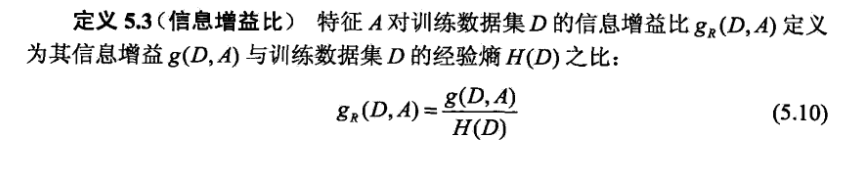

In [4]:
display(Image(filename='images/信息增益比.png'))

#### CART特征选择

CART算法中使用的时 基尼指数来选择特征

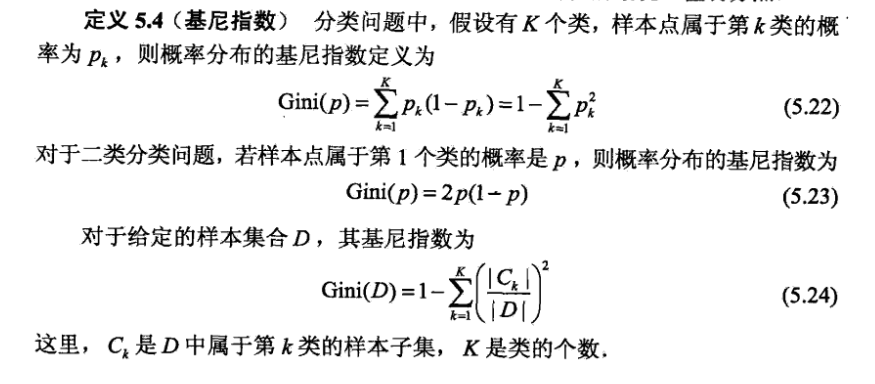

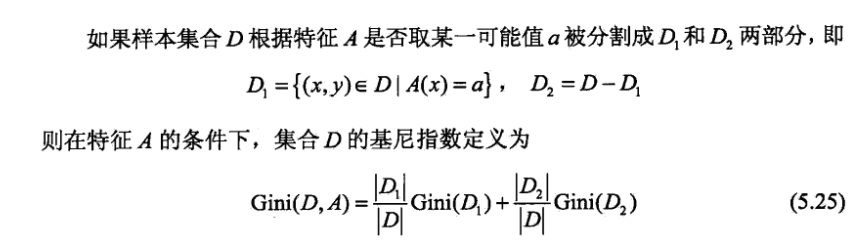

In [6]:
display(Image(filename='images/基尼指数1.png'))
display(Image(filename='images/基尼指数2.png'))

## 决策树生成

#### ID3决策树构建

ID3算法的核心在决策树各个结点上应用信息增益准则选择特征,递归地构建决策树,具体方法是:
从根结点(root node)开始,对结点计算所有可能的特征的信息增益,选择信息增益最大的特征
作为结点的特征,由该特征的不同取值建立子结点;再对子结点递归地调用以上的方法,构建决策树
;直到所有的特征的信息增益很小或没有特征可以选择为止.最后得到一个决策树.ID3相当于用极
大似然法进行概率模型的选择.

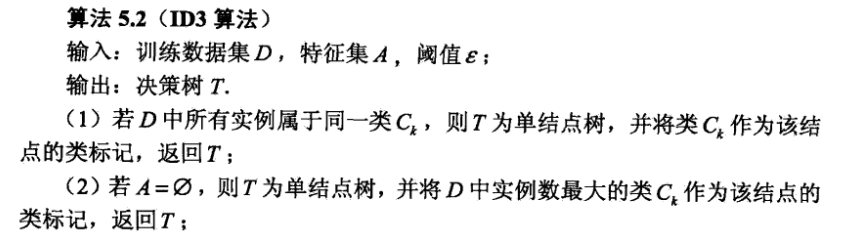

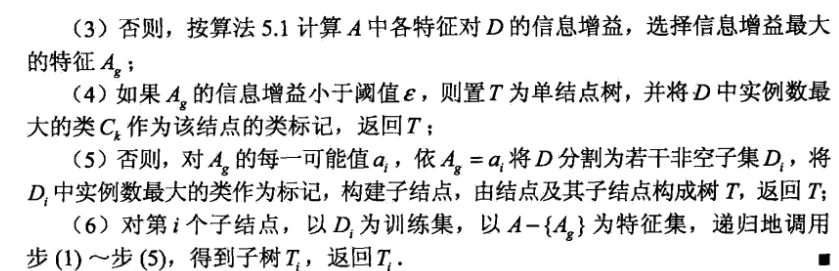

In [8]:
display(Image(filename='images/ID31.png'))
display(Image(filename='images/ID32.png'))

#### C4.5算法构建决策树

C4.5与ID3算法相似,C4.5对ID3算法进行了改进,C4.5在生成过程中,用信息增益比来选择特征

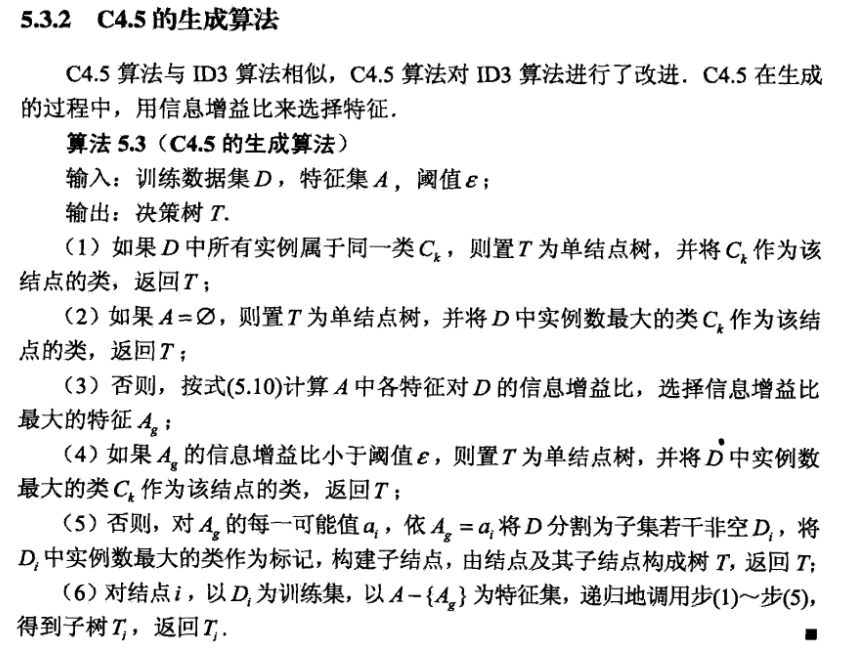

In [9]:
display(Image(filename='images/C45.png'))

#### CART决策树生成

CART分类树使用基尼指数选择最优特征,同时决定该特征的最优二值切分点

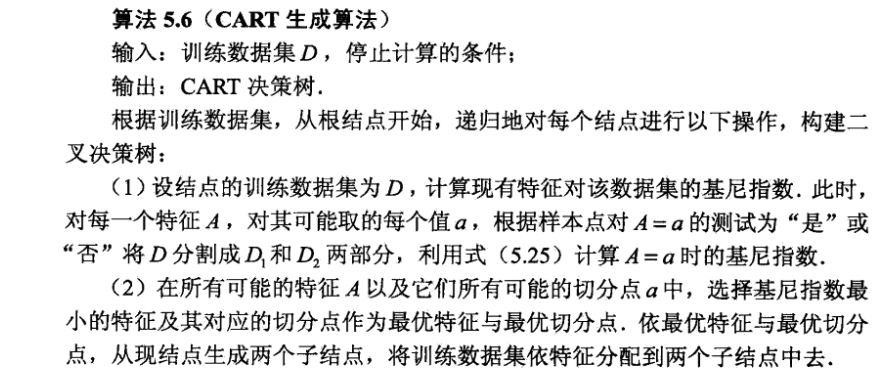

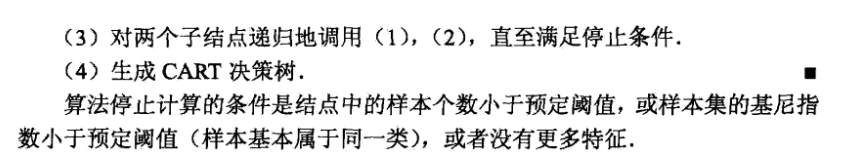

In [12]:
display(Image(filename='images/CART1.png'))
display(Image(filename='images/CART2.png'))

## 决策树剪枝

#### C4.5决策树剪枝

决策树生成算法递归地产生决策树,直到不能继续下去为止.这样产生的树往往对训练数据的分类
很准确,但对未知的测试数据的分类却没有那么准确,即出现过拟合现象.过拟合的原因在于学习
时过多的考虑如何提高对训练数据的正确分类.从而构建出过于复杂的决策树,解决这个问题的
办法是考虑决策树的复杂度,对已生成的决策树进行简化.

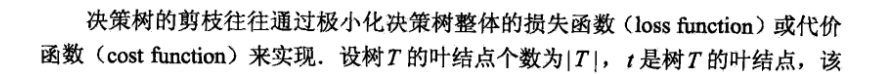

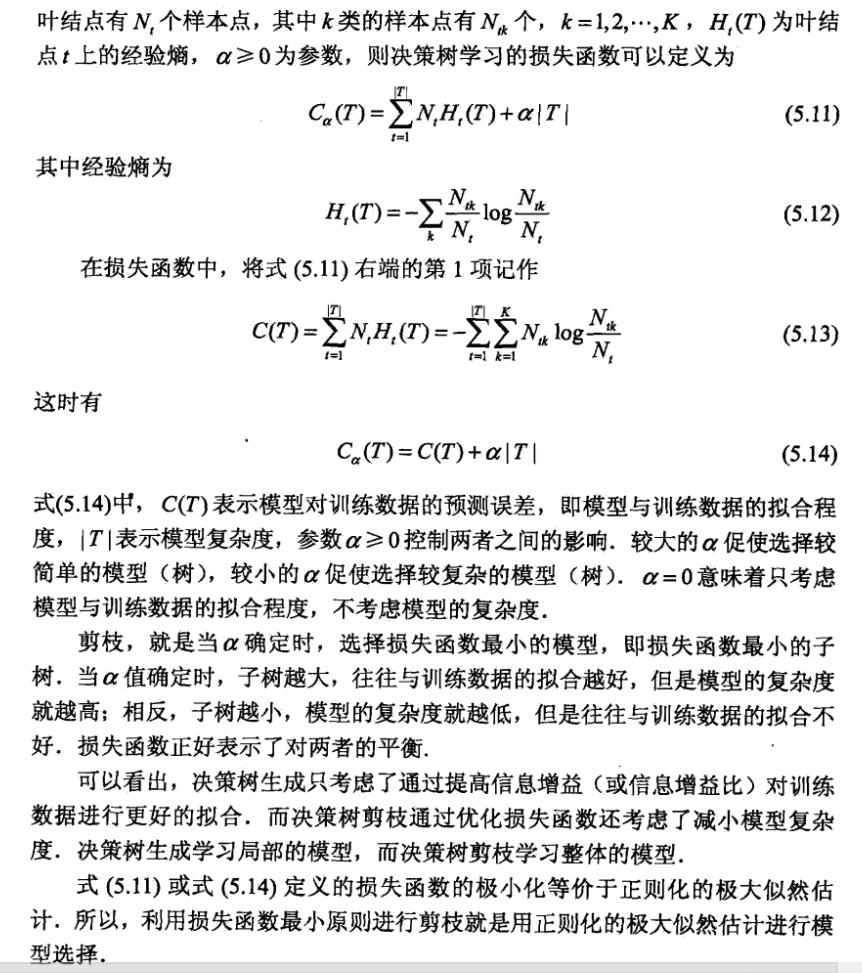

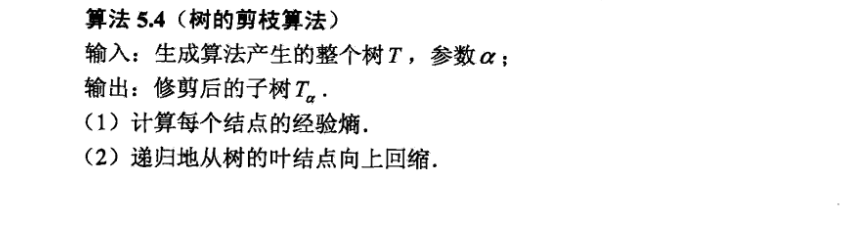

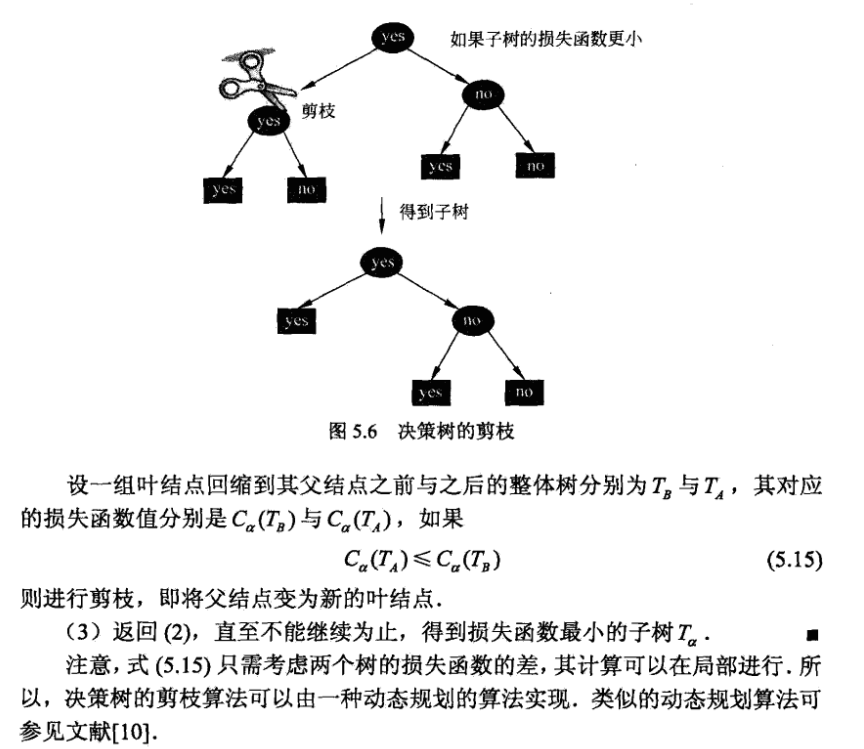

In [17]:
display(Image(filename='images/TREECUT1.png'))
display(Image(filename='images/TREECUT2.png'))
display(Image(filename='images/TREECUT3.png'))
display(Image(filename='images/TREECUT4.png'))

#### CART决策树剪枝

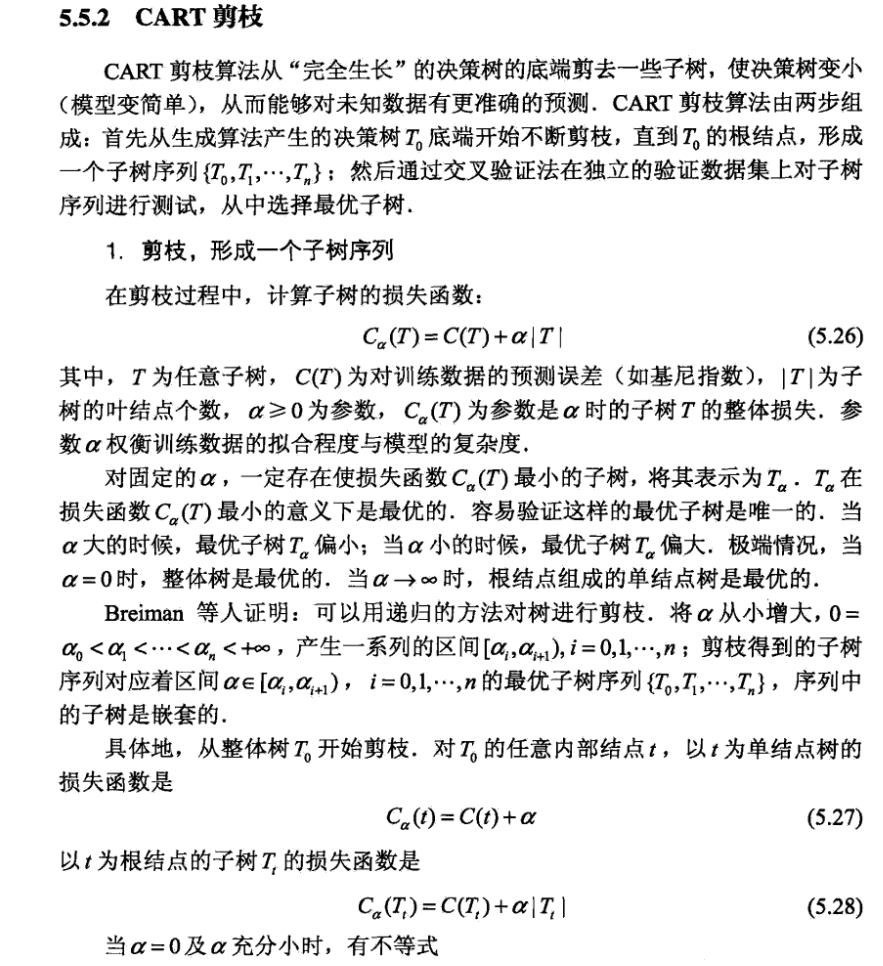

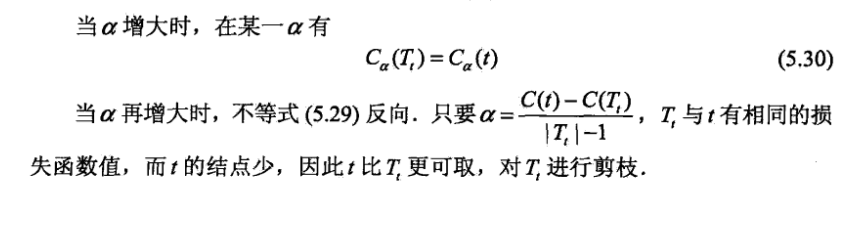

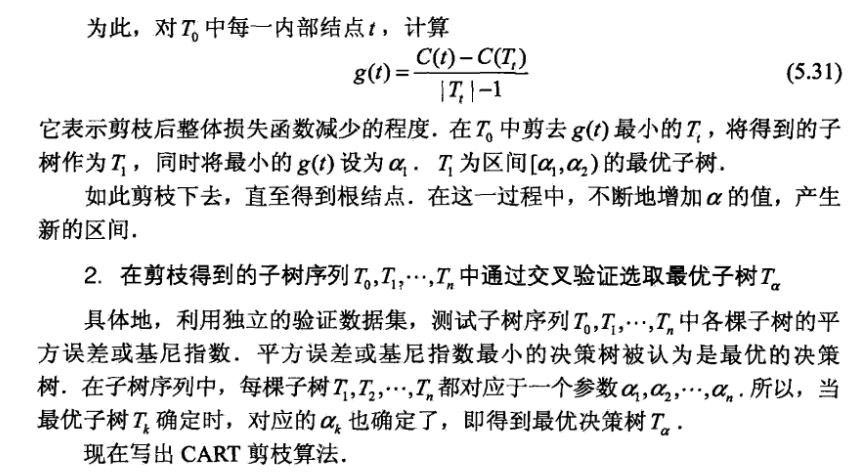

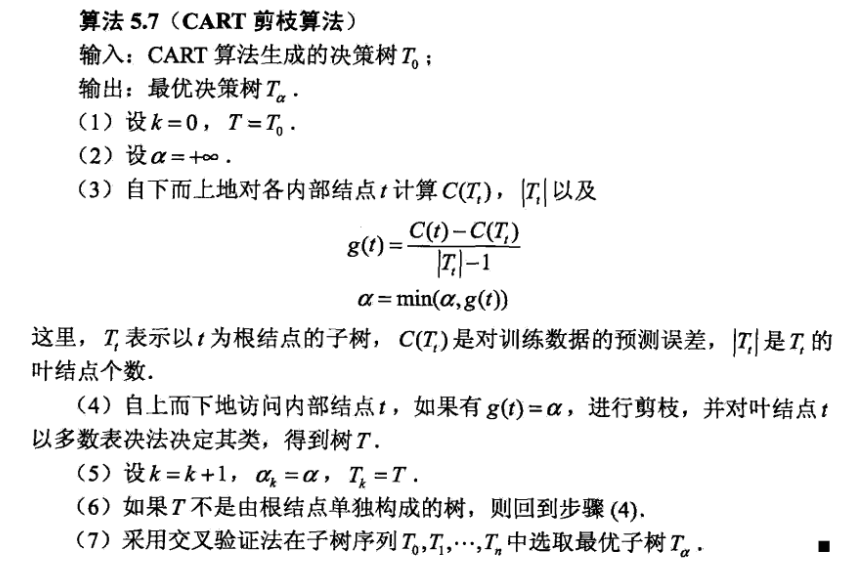

In [18]:
display(Image(filename='images/CARTCUT1.png'))
display(Image(filename='images/CARTCUT2.png'))
display(Image(filename='images/CARTCUT3.png'))
display(Image(filename='images/CARTCUT4.png'))

关于决策树的一些资料:

http://www.cnblogs.com/pinard/p/6050306.html

http://www.cnblogs.com/pinard/p/6053344.html

## 实例

sklearn 决策树参数说明 参考:https://www.cnblogs.com/pinard/p/6056319.html

In [20]:
from sklearn.datasets import load_iris
from sklearn import tree
import sys
import os  

In [21]:
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [22]:
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [23]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("iris.pdf") 

True

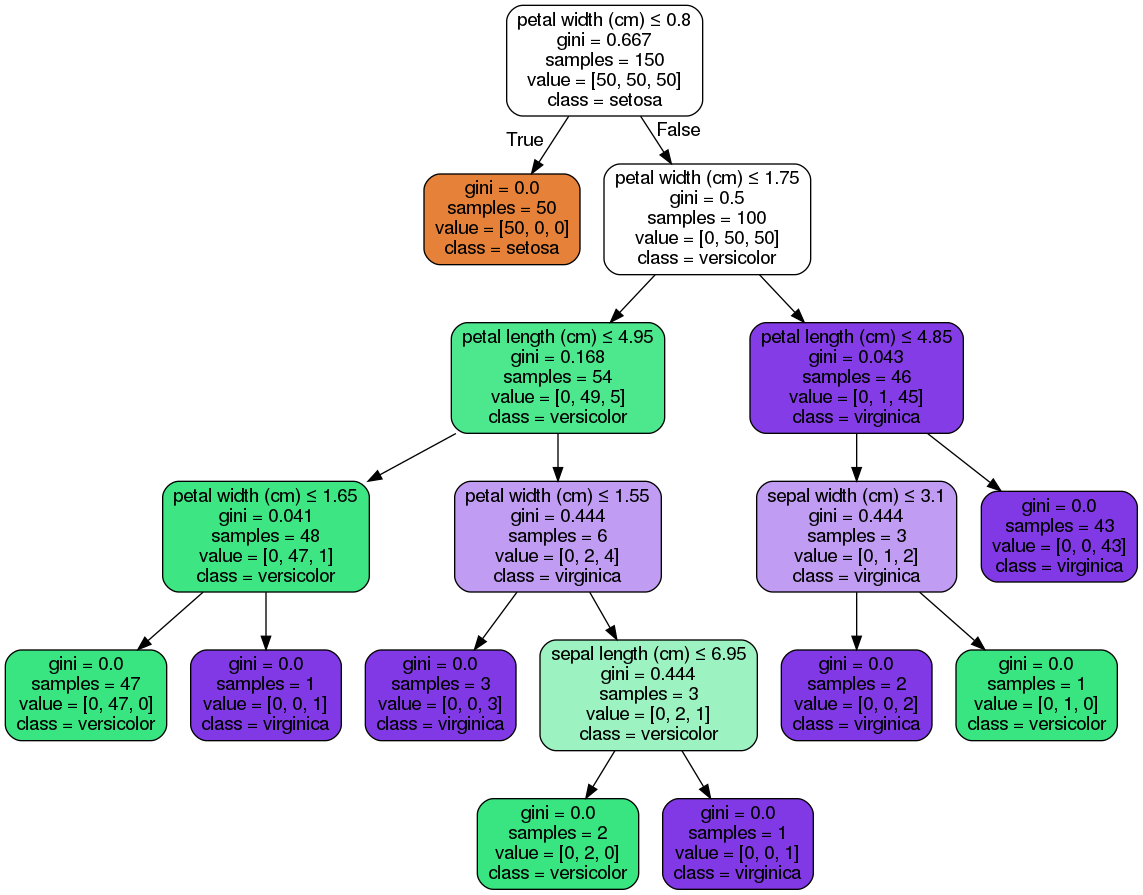

In [24]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

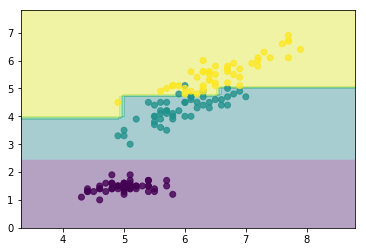

In [25]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier


# 仍然使用自带的iris数据
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# 训练模型，限制树的最大深度4
clf = DecisionTreeClassifier(max_depth=4)
#拟合模型
clf.fit(X, y)


# 画图
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()

In [27]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

ValueError: Length of feature_names, 4 does not match number of features, 2